In [1]:
import pandas as pd

# Load the Titanic dataset
file_path = 'c:/Users/X1/Desktop/titanic-survival-analysis/data/titanic_data.csv'
titanic_data = pd.read_csv(file_path)

# First look at the data
titanic_data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# Summary statistics
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [3]:
# Data types and missing values
titanic_data.info()
titanic_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [4]:
import os
os.chdir('..')  # Move one directory up to 'titanic-survival-analysis'


In [5]:
from src.data_preprocessing import clean_data

# Clean the data
cleaned_data = clean_data(titanic_data)
cleaned_data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,2
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,2
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,2


c:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


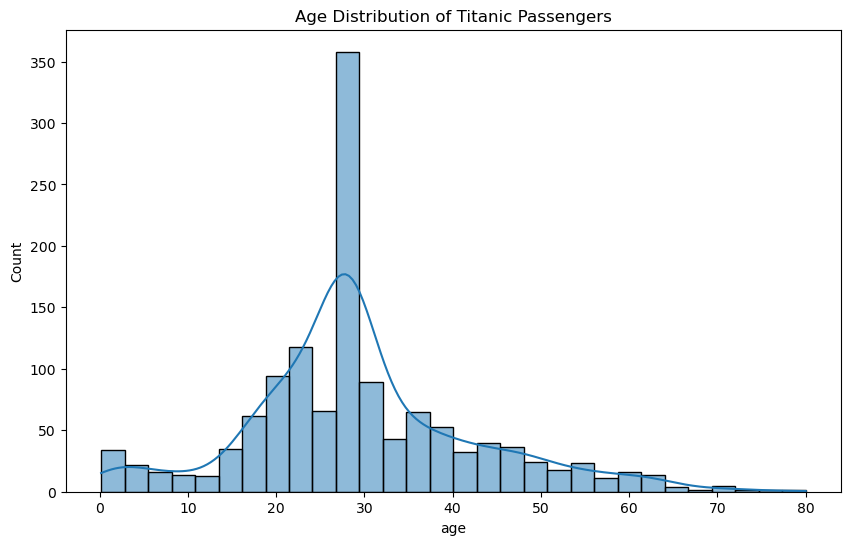

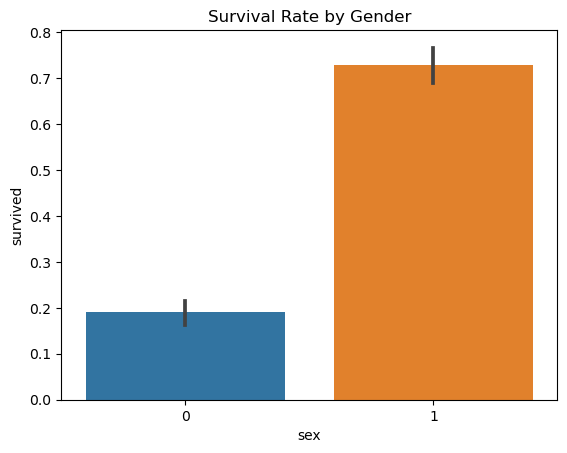

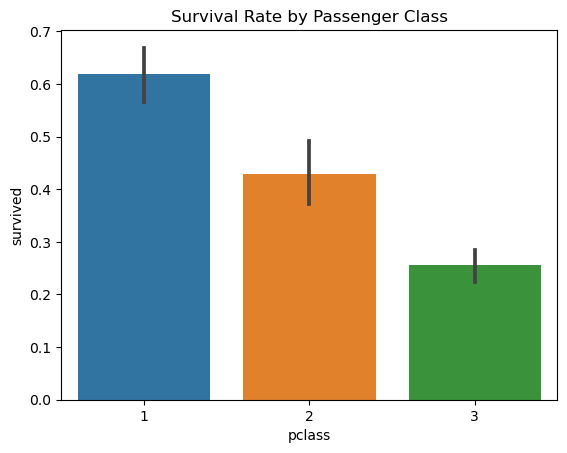

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.savefig('images/age_distribution.png')
plt.show()

# Survival rate by sex
sns.barplot(x='sex', y='survived', data=cleaned_data)
plt.title('Survival Rate by Gender')
plt.savefig('images/survival_by_gender.png')
plt.show()

# Survival rate by passenger class
sns.barplot(x='pclass', y='survived', data=cleaned_data)
plt.title('Survival Rate by Passenger Class')
plt.savefig('images/survival_by_class.png')
plt.show()


In [7]:
cleaned_data['family_size'] = cleaned_data['sibsp'] + cleaned_data['parch']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Select relevant features for modeling
features = ['pclass', 'sex', 'age', 'fare', 'family_size', 'embarked']
X = cleaned_data[features]
y = cleaned_data['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


Accuracy: 0.78
Confusion Matrix:
 [[127  17]
 [ 41  77]]


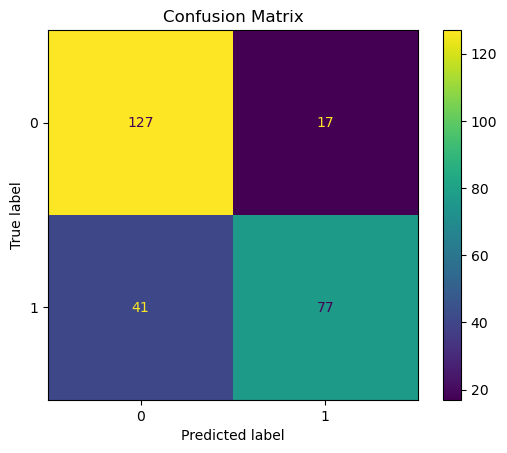

In [9]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix.png')
plt.show()
